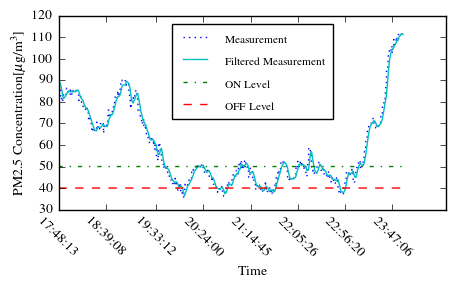

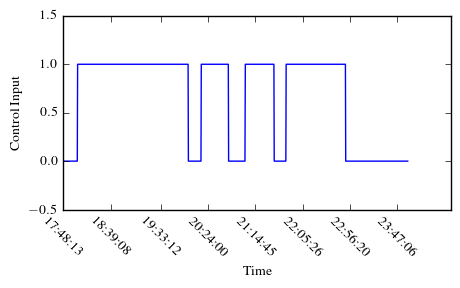

In [4]:
import csv
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rc
import numpy as np
#from matplotlib2tikz import save as tikz_save

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
fp = open('data.csv','r')
reader = csv.reader(fp)  # creates the reader object
dat = []
t = []
ts = []
pm25 = []
control = []
i = 0;
for row in reader:
    i += 1
    if i > 13 and i < 1100 and float(row[4])>0:
        dat.append(row)
        ts.append(row[3])
        t.append(get_sec(row[3]))
        pm25.append(row[4])
        control.append(row[6])
        
list_pmf = []
pmf = []
for i in range(0,len(pm25)):
    list_pmf.append(float(pm25[i]))
    if len(list_pmf)>10:
        list_pmf.pop(0)
    pmf.append(np.mean(list_pmf))

ta = []
for s in t:
    if s < 6000:
        s = s + get_sec('24:00:00')
    ta.append(s - t[0])

tst = []
tat = []
for i in range(0,len(ts)-1):
    if i%150 == 0:
        tst.append(ts[i])
        tat.append(ta[i])


fig = plt.figure(figsize=(5, 2.5))
l1 = plt.plot(ta,pm25,label=r'Measurement')
l4 = plt.plot(ta,pmf,label=r'Filtered Measurement',color='c')
l2 = plt.plot(ta,50*np.ones(np.size(ta)),label=r'ON Level',color='g')
l3 = plt.plot(ta,40*np.ones(np.size(ta)),label=r'OFF Level',color='r')
plt.setp(l1, linewidth=1, linestyle=':') 
plt.setp(l2, linewidth=1, linestyle='-.')
plt.setp(l3, linewidth=1, linestyle='--')
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off') # labels along the bottom edge are off
plt.xticks(tat,tst, rotation=-45)
plt.ylabel(r'PM2.5 Concentration[$\mu$g/m$^3$]')
plt.xlabel(r'Time')
legend = plt.legend(loc='upper center', shadow=None)
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')
plt.show()
#plt.savefig('control_pm25.pdf',bbox_inches='tight')
#plt.close()

fig = plt.figure(figsize=(5, 2.5))
lines = plt.plot(ta,control)
plt.setp(lines, linewidth=1)  
plt.xticks(tat,tst, rotation=-45)
plt.ylim([-0.5,1.5])
plt.ylabel('Control Input')
plt.xlabel('Time')
plt.grid(False)
plt.show()
#plt.savefig('control_input.pdf',bbox_inches='tight')
#plt.close()

    

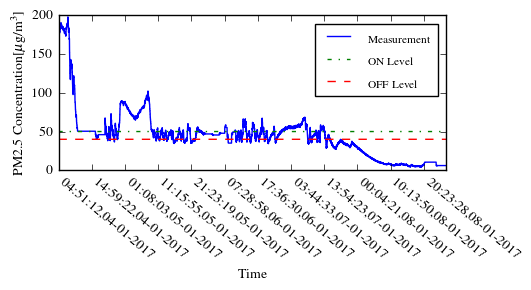

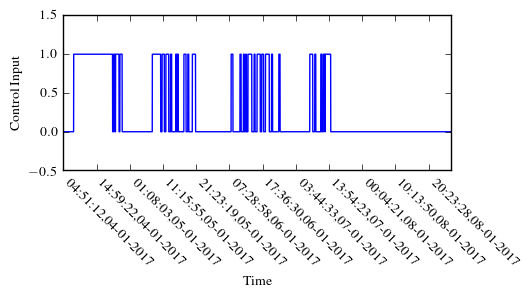

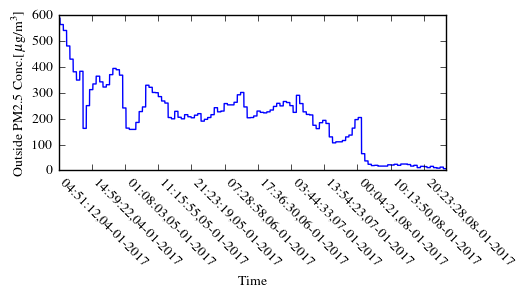

In [6]:
import csv
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
#from matplotlib2tikz import save as tikz_save
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)


fp = open('data.csv','r')
reader = csv.reader(fp)  # creates the reader object
dat = []
t = []
ts = []
ta = []
ds = []
pm25 = []
pm25o = []
control = []
i = 0;
Is = 19000
Ie = 40000
for row in reader:
    i = i + 1
    if i >= Is and i<=Ie:
        dat.append(row)
        ta.append(i-Is)
        ds.append(row[2])
        ts.append(row[3])
        pm25.append(row[4])
        control.append(row[6])
        pm25o.append(row[7])


tst = []
tat = []
for i in range(0,len(ts)-1):
    if i%1800 == 0:
        tst.append(ts[i]+','+ds[i])
        tat.append(ta[i])


fig = plt.figure(figsize=(5, 2))
l1 = plt.plot(ta,pm25,label=r'Measurement')
l2 = plt.plot(ta,50*np.ones(np.size(ta)),label=r'ON Level',color='g')
l3 = plt.plot(ta,40*np.ones(np.size(ta)),label=r'OFF Level',color='r')
plt.setp(l1, linewidth=1) 
plt.setp(l2, linewidth=1, linestyle='-.')
plt.setp(l3, linewidth=1, linestyle='--')
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off') # labels along the bottom edge are off
plt.xticks(tat,tst, rotation=-40, ha='left')
plt.ylabel(r'PM2.5 Concentration[$\mu$g/m$^3$]')
plt.xlabel(r'Time')
plt.autoscale(enable=True, axis='both', tight=None)
legend = plt.legend(loc='upper right', shadow=None)
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')
#plt.grid(True)
plt.show()
#plt.savefig('control2_pm25.pdf',bbox_inches='tight')
#plt.close()

fig = plt.figure(figsize=(5, 2))
lines = plt.plot(ta,control)
plt.setp(lines, linewidth=1)  
plt.xticks(tat,tst, rotation=-45, ha='left')
plt.ylim([-0.5,1.5])
plt.ylabel('Control Input')
plt.xlabel('Time')
plt.autoscale(enable=True, axis='x', tight=None)
plt.grid(False)
plt.show()
#plt.savefig('control2_input.pdf',bbox_inches='tight')
#plt.close()

fig = plt.figure(figsize=(5, 2))
lines = plt.plot(ta,pm25o,label=r'Outside')
plt.setp(lines, linewidth=1)  
plt.xticks(tat,tst, rotation=-45, ha='left')
plt.ylabel('Outside PM2.5 Conc.[$\mu$g/m$^3$]')
plt.xlabel('Time')
plt.autoscale(enable=True, axis='both', tight=None)
plt.grid(False)
plt.show()
#plt.savefig('control2_outside.pdf',bbox_inches='tight')
#plt.close()

    